<center>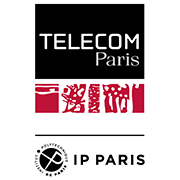</center>

<h1><center><strong><font color='crimson'>
  IA 717: Poetry Generation Project
</font></strong></center></h1>

<center>
  <h3> Project Supervisor <br/> Cyril Chhun</h3>
  <email>cyril.chhun@telecom-paris.fr</email>
  <br/>
  Year 2021-2022
</center>

<h3><center><font color='cornflowerblue'><strong>
    Student Version  
</strong></font></center></h3>

<student><center>

  Ramzi Khalifa
  <br/>Louis-Gabriel Pouillot
  <br/>Yann Rodriguez
</student></center>

---
# <font color="crimson">__SETUP__</font>

## __Packages__

In [4]:
import os
import sys
import torch

# garbage collector of collab
import gc


## __Mount drive google & setup cuda/cpu device__

In [5]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
  # drive.mount("/content/drive", force_remount=True)


# Use CUDA if on a GPU :
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
DEVICE = str(device)
print(device)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cuda


In [6]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [7]:
def clean_memory():
  gc.collect()
  torch.cuda.empty_cache()

clean_memory()

## __Paths__

In [8]:
if IN_COLAB:
    ROOT_PATH = '/content/drive/MyDrive/Colab Notebooks/IA717_NLP_Poem_project/'
else:
    ROOT_PATH = './'

DRAMACODE_PATH  = os.path.join(ROOT_PATH, 'dramacode.github.io')
NAKED_PATH = os.path.join(DRAMACODE_PATH , 'naked')
NAKED_CLEAN_PATH = os.path.join(DRAMACODE_PATH, 'naked_clean')
NAKED_POSTAGGED_PATH = os.path.join(DRAMACODE_PATH, 'naked_pos_tagged') # Where tagged files will be stored


## __Params__

### Setup



In [9]:
POS_TAGGING = True

### POS Tagging (exploratory)

### Install libs

In [10]:
!pip install deplacy
!pip install trankit transformers

     |████████████████████████████████| 773 kB 7.9 MB/s 
     |████████████████████████████████| 3.5 MB 67.7 MB/s 
     |████████████████████████████████| 6.8 MB 53.3 MB/s 
     |████████████████████████████████| 776.8 MB 17 kB/s 
     |████████████████████████████████| 1.2 MB 48.0 MB/s 
     |████████████████████████████████| 895 kB 85.9 MB/s 
     |████████████████████████████████| 1.9 MB 83.0 MB/s 
     |████████████████████████████████| 67 kB 7.1 MB/s 
     |████████████████████████████████| 596 kB 94.7 MB/s 
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941188 sha256=8ed3de4fb3a029a003dd874597da371e0767c7ee6cb022a32ca0937bab0ed372
  Stored in directory: /root/.cache/pip/wheels/2b/bb/7f/11e4db39477278161e882eadc46fb558949a28b13470fc74b8
Successfully built langid
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: torch
    Found existin

In [11]:
# it takes time
import trankit
nlp=trankit.Pipeline("french", cache_dir="./trankit_cache")

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

http://nlp.uoregon.edu/download/trankit/v1.0.0/xlm-roberta-base/french.zip


Downloading: 100%|██████████| 39.6M/39.6M [00:00<00:00, 50.7MiB/s]


Loading pretrained XLM-Roberta, this may take a while...


Downloading:   0%|          | 0.00/512 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Loading tokenizer for french
Loading tagger for french
Loading multi-word expander for french
Loading lemmatizer for french
Loading NER tagger for french
Active language: french


## Test on single sentence

### Tagging

In [12]:
racine="Comblé de tant d’honneurs, par quel secret outrage  \n \
Les dieux à vos désirs toujours si complaisants, \n \
Vous font-ils méconnaître, et haïr leurs présents ? \n"
doc = nlp(racine)
doc

{'lang': 'french',
 'sentences': [{'dspan': (0, 156),
   'id': 1,
   'text': 'Comblé de tant d’honneurs, par quel secret outrage  \n Les dieux à vos désirs toujours si complaisants, \n\xa0Vous font-ils méconnaître, et haïr leurs présents ?',
   'tokens': [{'deprel': 'advcl',
     'dspan': (0, 6),
     'feats': 'Gender=Masc|Number=Sing|Tense=Past|VerbForm=Part',
     'head': 23,
     'id': 1,
     'lemma': 'combler',
     'ner': 'O',
     'span': (0, 6),
     'text': 'Comblé',
     'upos': 'VERB'},
    {'deprel': 'case',
     'dspan': (7, 9),
     'head': 3,
     'id': 2,
     'lemma': 'de',
     'ner': 'O',
     'span': (7, 9),
     'text': 'de',
     'upos': 'ADP'},
    {'deprel': 'obl:arg',
     'dspan': (10, 14),
     'head': 1,
     'id': 3,
     'lemma': 'tant',
     'ner': 'O',
     'span': (10, 14),
     'text': 'tant',
     'upos': 'ADV'},
    {'deprel': 'case',
     'dspan': (15, 17),
     'head': 5,
     'id': 4,
     'lemma': 'd’',
     'ner': 'O',
     'span': (15, 17),
   

### Dependency tree

In [13]:
import deplacy
deplacy.render(doc)

Comblé       VERB  ═══════╗═╗═════════════╗<══╗   advcl
de           ADP   <════╗ ║ ║             ║   ║   case
tant         ADV   ═══╗═╝<╝ ║             ║   ║   obl:arg
d’           ADP   <╗ ║     ║             ║   ║   case
honneurs     NOUN  ═╝<╝     ║             ║   ║   obl:arg
,            PUNCT <════════╝             ║   ║   punct
par          ADP   <════════════════════╗ ║   ║   case
quel         DET   <══════════════════╗ ║ ║   ║   det
secret       ADJ   <════════════════╗ ║ ║ ║   ║   amod
outrage      NOUN  ═══════════════╗═╝═╝═╝ ║<╗ ║   obl:mod
Les          DET   <════════════╗ ║       ║ ║ ║   det
dieux        NOUN  ═══════════╗═╝<╝       ║ ║ ║   appos
à            ADP   <════════╗ ║           ║ ║ ║   case
vos          DET   <══════╗ ║ ║           ║ ║ ║   det
désirs       NOUN  ═════╗═╝═╝<╝           ║ ║ ║   nmod
toujours     ADV   <══╗ ║                 ║ ║ ║   advmod
si           ADV   <╗ ║ ║                 ║ ║ ║   advmod
complaisants ADJ   ═╝═╝<╝                 ║ ║ ║   am

## Tagging files

In [ ]:
## FOR REAL

from deplacy.deplacy import makeDoc

import pprint  # for pretty printing
pp = pprint.PrettyPrinter()

def pos_tagging(doc):
  """
  Returns a list of tuples with (word, pos, dep)
  """
  DOC=makeDoc(doc)
  # if len(DOC)==0:
  #     return
  deps=[]
  for i in range(len(DOC)):
    d=DOC[i].dep_
    deps.append(d)

  s=""
  tups_array=[]
  for i in range(len(DOC)):
    r  = "" if DOC[i].pos_=="_" else DOC[i].pos_
    s += DOC[i].orth_+" "+r+" "+" "+d+"\n"
    tup = (DOC[i].orth_ , r, deps[i])

    tups_array.append(tup)
  return tups_array

In [18]:
# file_name = "delavigne_familletempsluther.txt"
# file_path = os.path.join(NAKED_PATH, file_name)
# with open(file_path) as fn:
#   lines = fn.readlines(900)

def parse_and_tag(lines):
  """
  Concatenates lines and do pos tagging

  Returns a list of tuples with (word, pos, pos2)
  """
  all = ""
  for line in lines:
    all += " " + line

  doc = nlp(all)

  tagged_list = pos_tagging(doc)
  return tagged_list

In [19]:
# Modified

def tag_corpus(keep_alex_only=False):

    TEST_MODE=False
    NUM_TEST_FILES_SUBSET=1 # test on 1 file
    if TEST_MODE:
      file_names = os.listdir(NAKED_PATH)[:NUM_TEST_FILES_SUBSET]
    else: file_names = os.listdir(NAKED_PATH)
    
    num = len(file_names)
    print(f"\n{num} files to tag...\n")

    # print(f'keep_alex_only:\t{keep_alex_only}\n')
    
    for file_name in file_names :
        source_path = os.path.join(NAKED_PATH, file_name)
        target_path = os.path.join(NAKED_POSTAGGED_PATH, file_name)
        
        with open(source_path) as f_input:
            to_tag_lines = f_input.readlines()
        
        print(f'({num}) tagging {file_name} ... ', end="")
        tagged_lines = parse_and_tag(to_tag_lines)
  
        with open(target_path, "w") as f_output:
            f_output.write('\n'.join('%s\t%s\t%s' % x for x in tagged_lines))
        num -= 1
        print("Done")



In [ ]:
# Added

if POS_TAGGING: 
  print('Tagging files...')
  tag_corpus()
  print('... All files tagged')
else:
  print('Nothing to do')

Tagging files...

897 files to tag...

(897) tagging dorimond_festindepierre.txt ... Done
(896) tagging voltaire_femmequiaraison.txt ... Done
(895) tagging nericault_glorieux.txt ... Done
(894) tagging moliere_princessedelide.txt ... Done
(893) tagging lesagedorneval_ilegougou.txt ... Done
(892) tagging thibouville_thelamire.txt ... Done
(891) tagging gilbert_rodogune.txt ... Done
(890) tagging chabanon_toisondor.txt ... Done
(889) tagging piron_ecoleperes.txt ... Done
(888) tagging dufresny_dedit.txt ... Done
(887) tagging taconet_epouxparchicane.txt ... Done
(886) tagging aure_genevieve70.txt ... Done
(885) tagging dufresny_departdescomediens.txt ... Done
(884) tagging rotrou_dombernarddecabrere.txt ... Done
(883) tagging lacalprenede_mortmitrhidate.txt ... Done
(882) tagging corneillet_bradamante.txt ... Done
(881) tagging regnard_coquette.txt ... Done
(880) tagging dugazon_modere.txt ... Done
(879) tagging rousseaup_mortdebucephale.txt ... Done
(878) tagging racine_mithridate.txt .